<a href="https://colab.research.google.com/github/M-luthra07/deep-learning-ann-unit-1/blob/main/2_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/M-luthra07/deep-learning-ann-unit-1/refs/heads/main/08_kc_house_data.csv')

In [3]:
df = df.drop(['id', 'date', 'zipcode'], axis=1)
X = df.drop('price', axis=1)
y = df['price']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [5]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
model = Sequential([
    Dense(19, activation='relu'),
    Dense(19, activation='relu'),
    Dense(19, activation='relu'),
    Dense(1)
])

In [7]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1)

Epoch 1/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 30223126528.0000 - val_loss: 26954330112.0000
Epoch 2/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 29467160576.0000 - val_loss: 25466470400.0000
Epoch 3/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 27769112576.0000 - val_loss: 26015580160.0000
Epoch 4/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 30111956992.0000 - val_loss: 25374136320.0000
Epoch 5/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 27237617664.0000 - val_loss: 25194625024.0000
Epoch 6/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 26395885568.0000 - val_loss: 25194014720.0000
Epoch 7/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 27498756096.0000 - val_loss: 25341296640.0000
Epoch 8/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 26808412160.0000 - val_loss: 25191489536.0000
Epoch 9/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 27884224512.0000 - val_loss: 25137999872.0000
Epoch 10/100
473/473 ━━━━━━━━━━━━━━━━

In [10]:
y_pred = model.predict(X_test)


203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [28]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}')
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.4f}')

MSE: 24727593485.620525, MAE: 97873.23234350888
R² Score: 0.8135


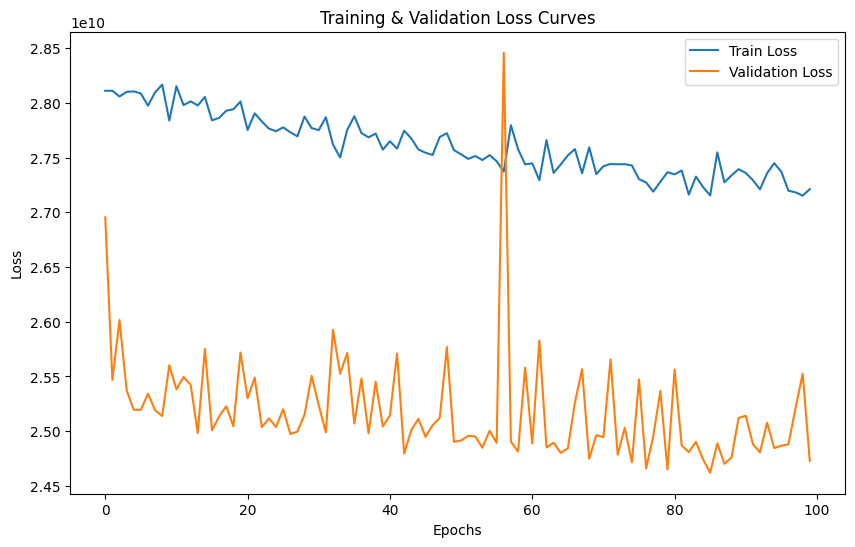

In [12]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss Curves')
plt.show()

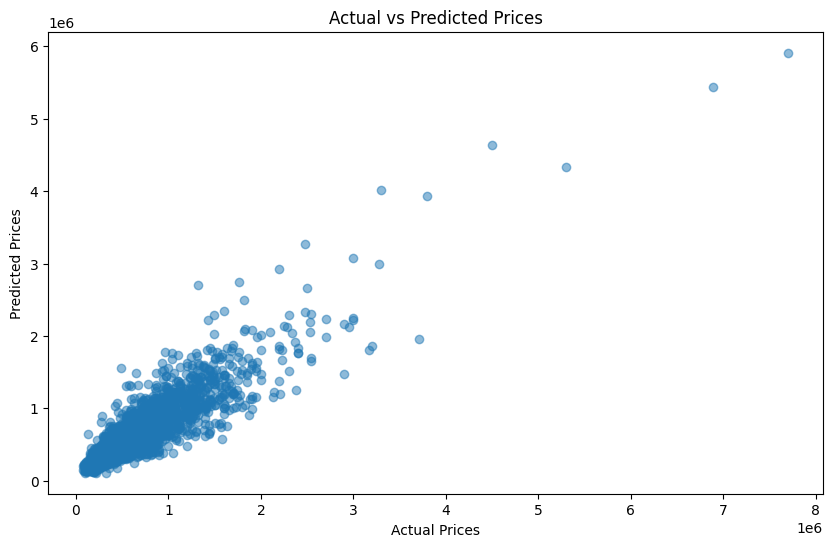

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix # Importing the confusion_matrix function

threshold = np.median(y_test)
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred.flatten() > threshold).astype(int)
cm = confusion_matrix(y_test_class, y_pred_class) # Now confusion_matrix is defined and can be used

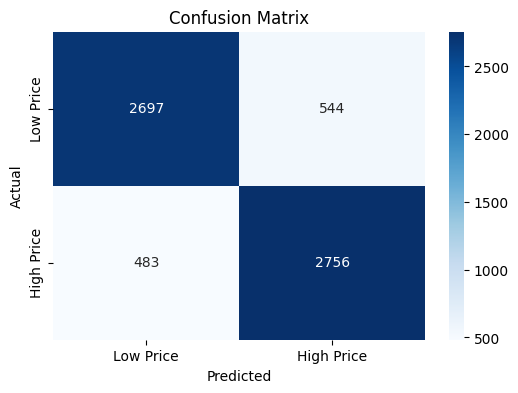

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Price', 'High Price'], yticklabels=['Low Price', 'High Price'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
def predict_house_price(new_data):
    new_data_scaled = scaler.transform(new_data)
    predicted_price = model.predict(new_data_scaled)
    return predicted_price

In [27]:
sample_house = np.array([X_test[1]])
predicted_price = predict_house_price(sample_house)
print(f'Predicted House Price: {predicted_price[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted House Price: 6816955.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
